# **Crop Yield Prediction in India**

### **Importing Libraries**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

###**Load Dataset**

In [23]:
# Load the datasets
crop_recommendation = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')
crop_production = pd.read_csv('/content/drive/MyDrive/crop_production.csv')

In [24]:
# Overview of the Crop Recommendation Dataset
print(crop_recommendation.head())
print(crop_recommendation.info())
print(crop_recommendation.describe())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
         

In [25]:
# the Crop Production Dataset
print(crop_production.head())
print(crop_production.info())
print(crop_production.describe())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Cr

 ## **Exploratory Data Analysis (EDA)**

In [26]:
# Checking missing values in both datasets
print(crop_recommendation.isnull().sum())
print(crop_production.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [27]:
# Basic statistics for numerical columns in both datasets
print(crop_recommendation.describe())
print(crop_production.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  
           Crop_Year       

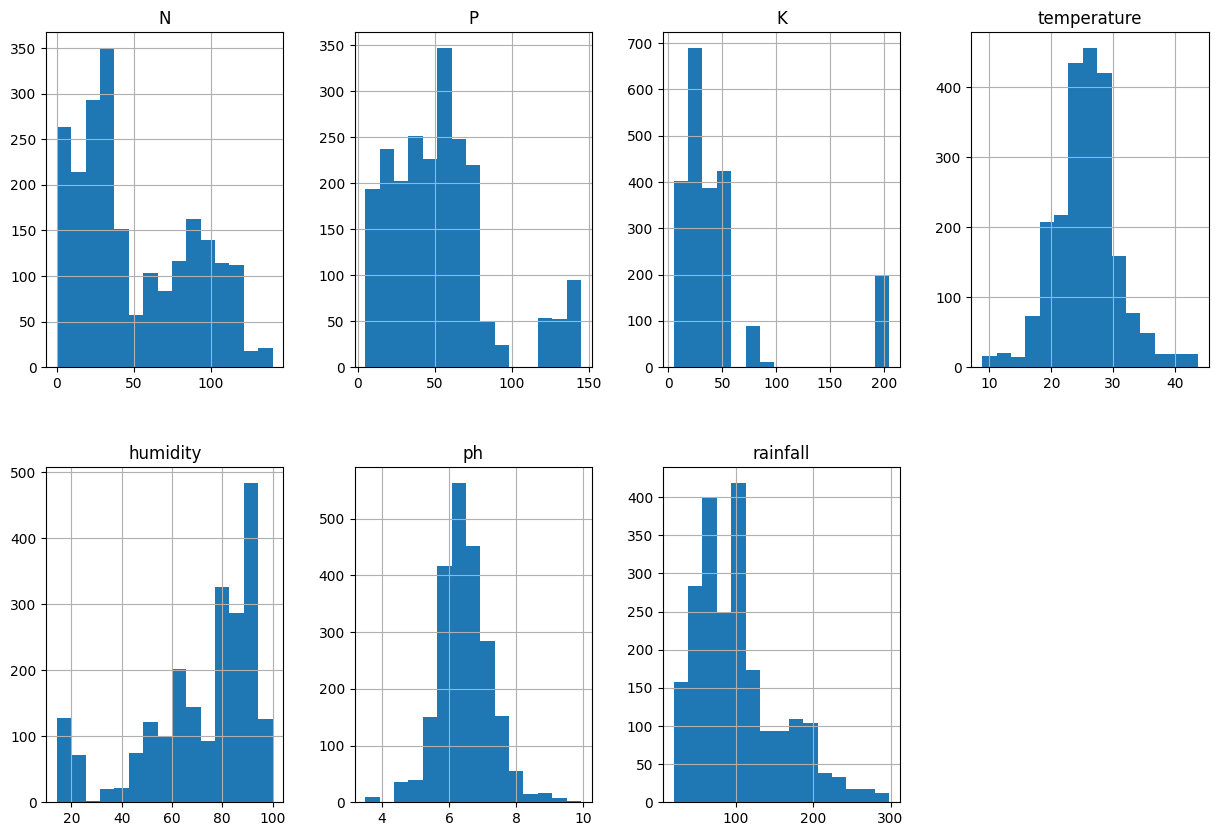

In [28]:
# Distribution of Nitrogen, Phosphorus, and Potassium
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
crop_recommendation[features].hist(bins=15, figsize=(15, 10), layout=(2, 4))
plt.show()

 ## **Data Visualization**

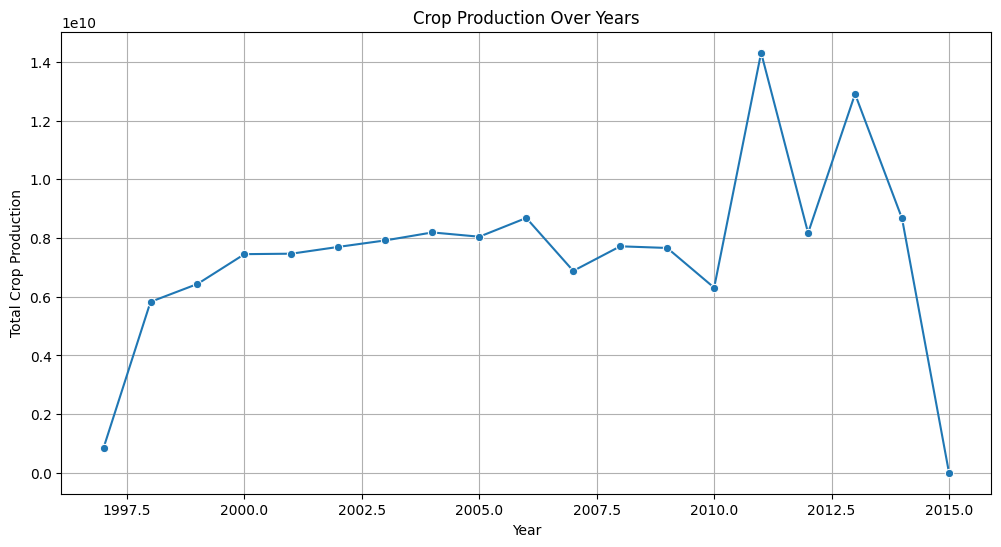

In [29]:
# Crop Production over Years
# Group the crop production data by year and sum the production
yearly_production = crop_production.groupby('Crop_Year')['Production'].sum().reset_index()

# Create a line plot to visualize crop production over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Crop_Year', y='Production', data=yearly_production, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Crop Production')
plt.title('Crop Production Over Years')
plt.grid(True)
plt.show()


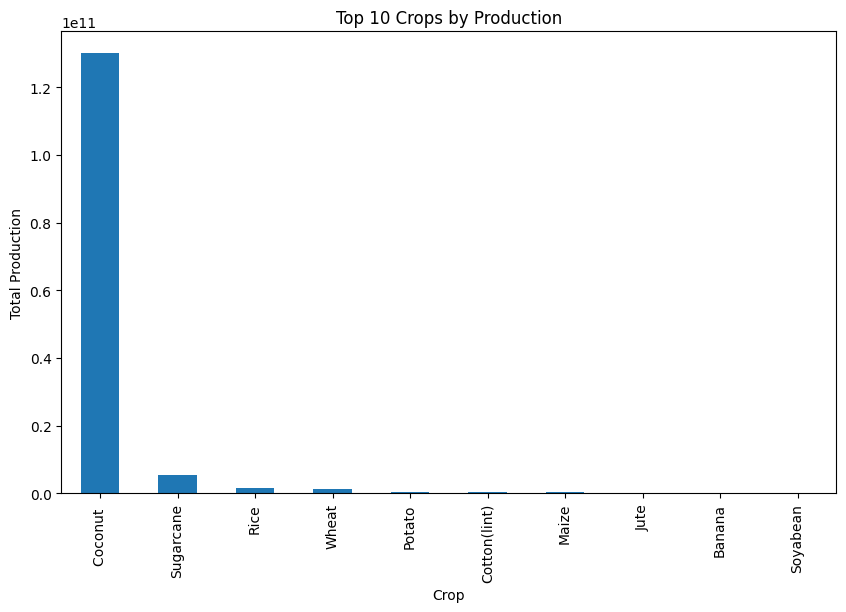

In [30]:
# Top 10 Crops by Production
top_crops = crop_production.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)
top_crops.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Crops by Production')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.show()

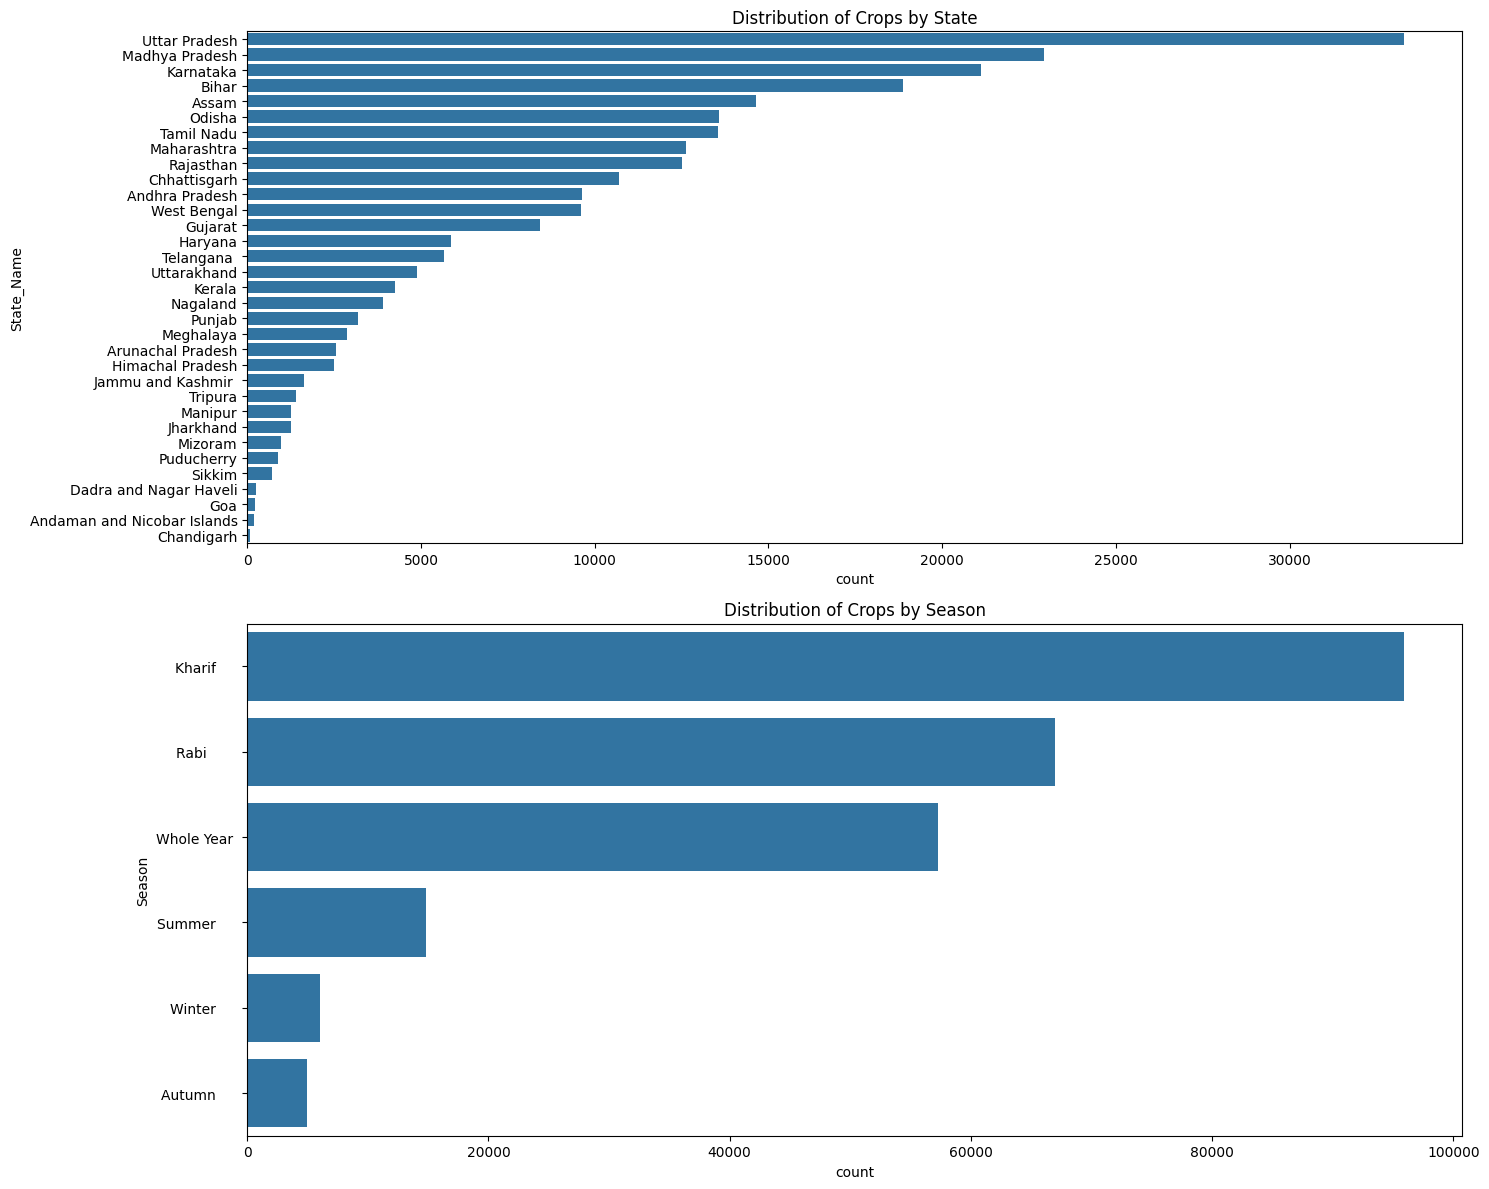

In [31]:
# Distribution of crops by state and season using the sampled dataset
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
sns.countplot(data=crop_production, y='State_Name', order=crop_production['State_Name'].value_counts().index, ax=axes[0])
axes[0].set_title('Distribution of Crops by State')
sns.countplot(data=crop_production, y='Season', order=crop_production['Season'].value_counts().index, ax=axes[1])
axes[1].set_title('Distribution of Crops by Season')
plt.tight_layout()
plt.show()

In [32]:
# Ensure that the column names and types are compatible
crop_recommendation.rename(columns={'label': 'Crop'}, inplace=True)
crop_production['Crop'] = crop_production['Crop'].str.lower()

# Merge the datasets on common columns
combined_df = pd.merge(crop_production, crop_recommendation, on=['Crop'], how='inner')

print("\nCombined Dataset:")
print(combined_df.head())



Combined Dataset:
                    State_Name District_Name  Crop_Year       Season  Crop  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif       rice   
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif       rice   
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif       rice   
3  Andaman and Nicobar Islands      NICOBARS       2000  Kharif       rice   
4  Andaman and Nicobar Islands      NICOBARS       2000  Kharif       rice   

    Area  Production   N   P   K  temperature   humidity        ph    rainfall  
0  102.0       321.0  90  42  43    20.879744  82.002744  6.502985  202.935536  
1  102.0       321.0  85  58  41    21.770462  80.319644  7.038096  226.655537  
2  102.0       321.0  60  55  44    23.004459  82.320763  7.840207  263.964248  
3  102.0       321.0  74  35  40    26.491096  80.158363  6.980401  242.864034  
4  102.0       321.0  78  42  42    20.130175  81.604873  7.628473  262.717340  


## **Feature Engineering and Encoding**

In [33]:
from math import comb
# Encoding categorical variables
label_encoder = LabelEncoder()
combined_df['State_Name'] = label_encoder.fit_transform(combined_df['State_Name'])
combined_df['District_Name'] = label_encoder.fit_transform(combined_df['District_Name'])
combined_df['Season'] = label_encoder.fit_transform(combined_df['Season'])
combined_df['Crop'] = label_encoder.fit_transform(combined_df['Crop'])

In [34]:
# Feature Engineering: Calculate production per hectare
combined_df['Yield'] = combined_df['Production'] / combined_df['Area']

In [35]:
# Feature engineering
combined_df['Rainfall_Temperature'] = combined_df['rainfall'] * combined_df['temperature']
combined_df['Humidity_Temperature'] = combined_df['humidity'] / combined_df['temperature']
combined_df['NPK_Ratio'] = (combined_df['N'] + combined_df['P'] + combined_df['K']) / 3

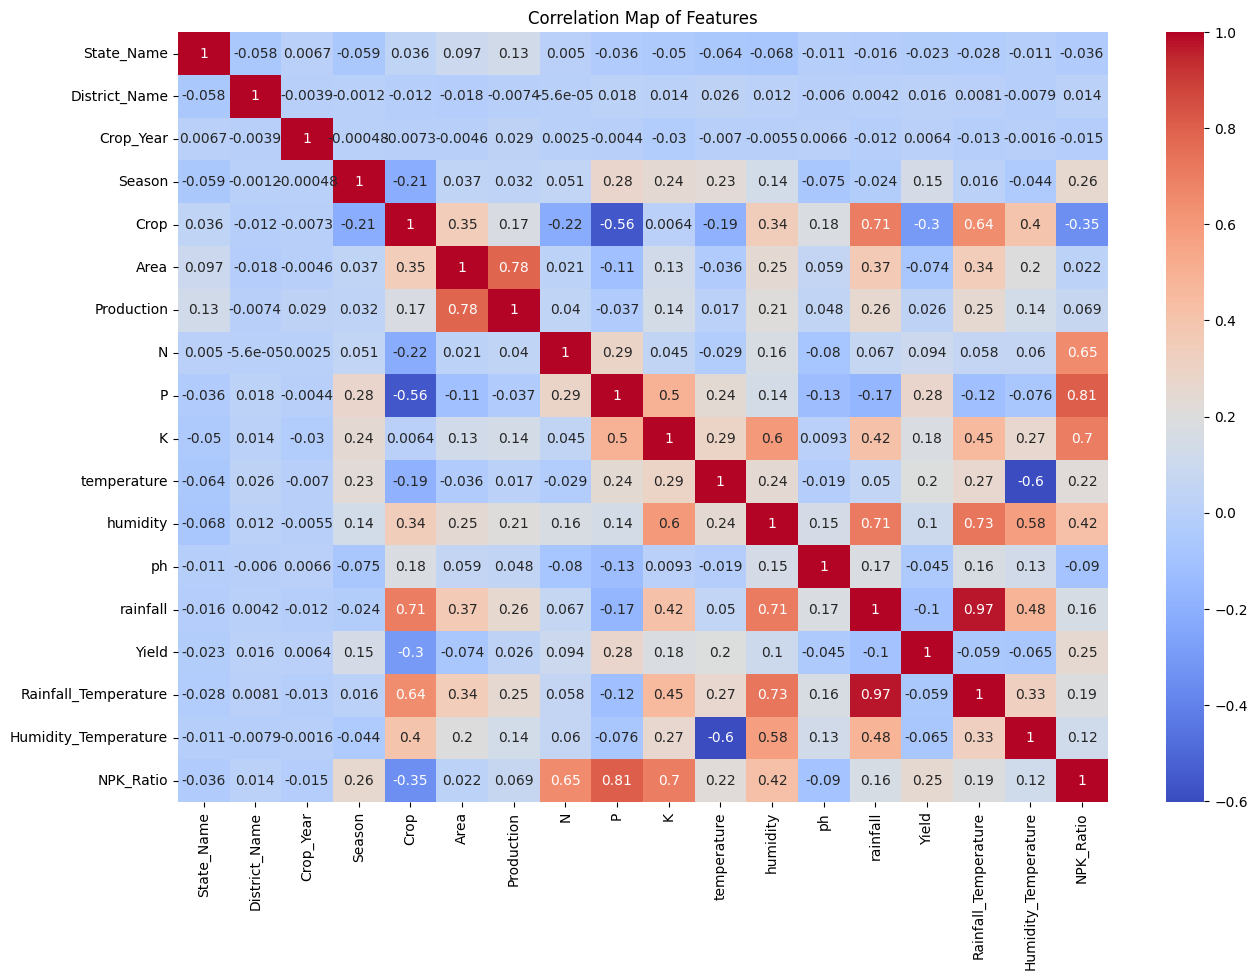

In [36]:
# Correlation Map
plt.figure(figsize=(15, 10))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Map of Features')
plt.show()


## **Model Building**

In [37]:
# Check for NaN values in 'Yield'
print(combined_df['Yield'].isnull().sum())

32200


In [38]:
# Impute NaN values in 'Yield' with the mean
combined_df['Yield'].fillna(combined_df['Yield'].mean(), inplace=True)

# Verify that there are no more NaN values in 'Yield'
print(combined_df['Yield'].isnull().sum())


0


In [39]:
# Splitting the Crop Production Dataset
X = combined_df.drop(['Production', 'Yield'], axis=1)
y = combined_df['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Linear Regression Model**

In [40]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Linear Regression RMSE:", mean_squared_error(y_test, lr_predictions, squared=False))
print("Linear Regression R2 Score:", r2_score(y_test, lr_predictions))

Linear Regression RMSE: 17.903143623477852
Linear Regression R2 Score: 0.13156868764144392


 ### **Decision Tree Regressor Model**

In [41]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree RMSE:", mean_squared_error(y_test, dt_predictions, squared=False))
print("Decision Tree R2 Score:", r2_score(y_test, dt_predictions))

Decision Tree RMSE: 0.23030773487798223
Decision Tree R2 Score: 0.9998562877030888



### **Random Forest Regressor Model**

In [42]:
# Random Forest Regressor with optimized parameters
rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=20,
    max_features='sqrt',
    max_samples=0.8,
    n_jobs=-1,
    random_state=42
)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2 Score:", rf_r2)

Random Forest RMSE: 3.121967812878123
Random Forest R2 Score: 0.9735921086116764


### **XGBoost Model**

In [43]:
!pip install xgboost
from xgboost import XGBRegressor

# Train an XGBoost model
xgb_model = XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Evaluate the model
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost RMSE:", xgb_rmse)
print("XGBoost R2 Score:", xgb_r2)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [44]:
from sklearn.ensemble import VotingRegressor

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=50, max_depth=30, min_samples_split=2, random_state=42)),
    ('xgb', XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1))
]

# Ensemble model
ensemble_model = VotingRegressor(estimators=base_models)
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)
ensemble_rmse = mean_squared_error(y_test, ensemble_predictions, squared=False)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

print("Ensemble Model RMSE:", ensemble_rmse)
print("Ensemble Model R2 Score:", ensemble_r2)


Ensemble Model RMSE: 1.7231327051415049
Ensemble Model R2 Score: 0.9919552170066966


In [45]:
import joblib
# Save the model
joblib.dump(ensemble_model, 'ensemble_model_crop_yield_model.pkl')

['ensemble_model_crop_yield_model.pkl']

In [61]:
#predict crop yield prediction by giving dummy dataset

import pandas as pd
# Load the saved model
loaded_model = joblib.load('ensemble_model_crop_yield_model.pkl')

# Create dummy data for prediction (replace with actual values)
dummy_data = pd.DataFrame({
    'State_Name': [0],  # Replace with encoded state
    'District_Name': [10],  # Replace with encoded district
    'Crop_Year': [2023],
    'Season': [1],  # Replace with encoded season
    'Crop': [5],  # Replace with encoded crop
    'Area': [1000],
    'N': [60],
    'P': [70],
    'K': [80],
    'temperature': [25],
    'humidity': [60],
    'ph': [6.5],
    'rainfall': [100],
    'Rainfall_Temperature': [2500],
    'Humidity_Temperature': [2.4],
    'NPK_Ratio': [70]
})

# Predict yield using the loaded model
predicted_yield = loaded_model.predict(dummy_data)

print("Predicted Yield:", predicted_yield[0])


Predicted Yield: 58.796389843996096
